# Logistic Regression: Classification of Handwritten Digits

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
digits = load_digits()

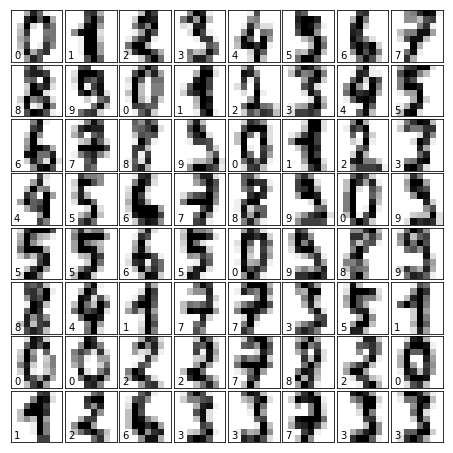

In [2]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Logitic Regression

In [3]:
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [4]:
from sklearn.linear_model import LogisticRegression

# train the model
clf = LogisticRegression(C=1e-10,multi_class="ovr")
''' build your LR model here and please specify the value of C'''

# fit on the training dataset
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

Let's plot the digits again with the predicted labels to get an idea of
how well the classification is working:

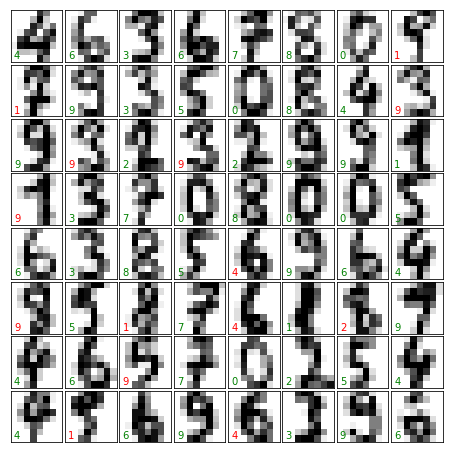

In [5]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

## Quantitative Measurement of Performance

We'd like to measure the performance of our estimator without having to resort
to plotting examples.  A simple method might be to simply compare the number of
matches:

In [6]:
matches = (predicted == expected)
matches.sum() / float(len(matches))

0.73777777777777775

In [7]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96        42
          1       0.61      0.84      0.70        44
          2       0.80      0.89      0.85        37
          3       1.00      0.71      0.83        48
          4       0.47      0.97      0.63        35
          5       1.00      0.45      0.62        55
          6       1.00      0.72      0.84        57
          7       1.00      0.66      0.80        50
          8       0.92      0.53      0.68        45
          9       0.41      0.84      0.55        37

avg / total       0.85      0.74      0.75       450



In [8]:
print(metrics.confusion_matrix(expected, predicted))

[[40  0  0  0  2  0  0  0  0  0]
 [ 0 37  5  0  0  0  0  0  0  2]
 [ 1  1 33  0  0  0  0  0  0  2]
 [ 0  2  1 34  0  0  0  0  0 11]
 [ 0  0  0  0 34  0  0  0  1  0]
 [ 0  4  1  0  4 25  0  0  0 21]
 [ 0  0  0  0 16  0 41  0  0  0]
 [ 0  3  0  0 12  0  0 33  1  1]
 [ 0 12  1  0  1  0  0  0 24  7]
 [ 0  2  0  0  4  0  0  0  0 31]]


We see here that in particular, the numbers 1, 2, 3, and 9 are often being labeled 8.